<a href="https://colab.research.google.com/github/brash99/phys441/blob/master/TravelingWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convection in 2D


### The 2D Convection Equation

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}= 0
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}= 0
\end{equation}

We use the forward difference for the time derivative, and the backward difference approximation for the first order spatial derivatives. 

\begin{equation}
\frac{u_{ij}^{n+1} -  u_{ij}^n}{\Delta t} + u_{ij}^n \left( \frac{u^n_{ij} - u^n_{(i-1)j}}{\Delta x} \right) +  v_{ij}^n \left( \frac{u^n_{ij} - u^n_{i(j-1)}}{\Delta y} \right) = 0
\end{equation}

\begin{equation}
\frac{v_{ij}^{n+1} -  v_{ij}^n}{\Delta t} + u_{ij}^n \left( \frac{v^n_{ij} - v^n_{(i-1)j}}{\Delta x} \right) +  v_{ij}^n \left( \frac{v^n_{ij} - v^n_{i(j-1)}}{\Delta y} \right) = 0
\end{equation}

Rearranging, we end up with two coupled equations:

\begin{equation}
u_{ij}^{n+1} =  u_{ij}^n + \frac{\Delta t}{\Delta x} u_{ij}^n \left( u^n_{ij} - u^n_{(i-1)j} \right) + v_{ij}^n \frac{ \Delta t}{\Delta y} \left( u^n_{ij} - u^n_{(i-1)j} \right)
\end{equation}

\begin{equation}
v_{ij}^{n+1} =  v_{ij}^n + \frac{\Delta t}{\Delta x} u_{ij}^n \left( v^n_{ij} - v^n_{(i-1)j} \right) + v_{ij}^n \frac{ \Delta t}{\Delta y} \left( v^n_{ij} - v^n_{(i-1)j} \right)
\end{equation}

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
from matplotlib import cm as cm          #here we load matplotlib
import time, sys                         #and load some utilities

In [2]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [91]:
xrange = 2.0
yrange = 2.0

nx = 81
ny = 81
nt = 200

dx = xrange / (nx-1)
dy = xrange / (nx-1)
sigma = .04
dt = sigma * dx

trange = dt*(nt-1)

x = np.linspace(0,xrange,nx)
y = np.linspace(0,yrange,ny)

print ("Stability criterion x = ",dt/dx)
print ("Stability criterion y = ",dt/dy)

Stability criterion x =  0.04
Stability criterion y =  0.04


In [92]:
# Set the wavefunction equal to all ones, initially
u = np.ones((ny, nx)) 
v = np.ones((ny, nx))

# Test Case 1: Rectangular Pulse
u[int(.5 / dx):int(1 / dx + 1),int(.5 / dx):int(1 / dx + 1)] = 5  #setting u = 2 between 0.5 and 1 in each of x and y
v[int(.5 / dx):int(1 / dx + 1),int(.5 / dx):int(1 / dx + 1)] = 5  #setting u = 2 between 0.5 and 1 in each of x and y

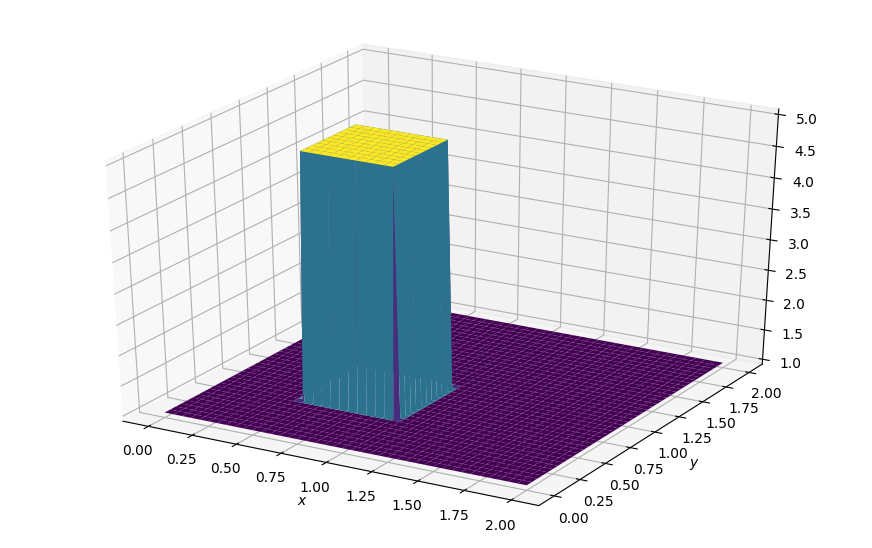

In [93]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11, 7), dpi=100)  # first, create a figure object of a certain size and resolutin
ax = fig.gca(projection='3d')               # next, create an axes object, and specify that it is 3D       
X, Y = np.meshgrid(x, y)                    # next, convert the x and y arrays into a 2D meshgrid for plotting        
surf = ax.plot_surface(X, Y, u[:],cmap=cm.viridis, rstride=2, cstride=2)          # finally, plot the surface.
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

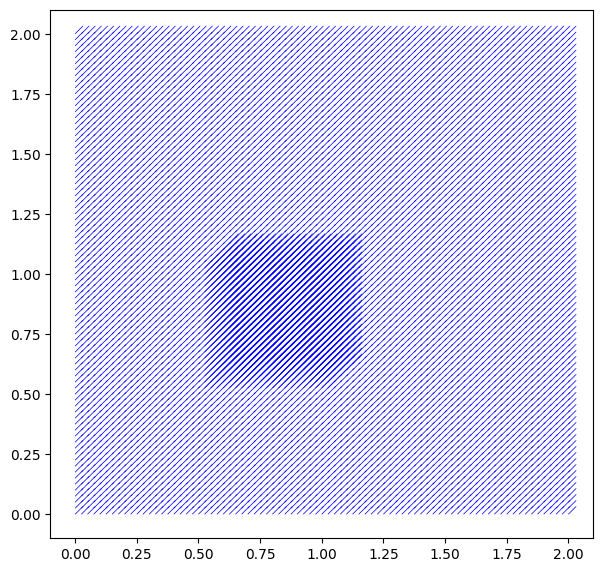

In [94]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
q = ax.quiver(X, Y, u, v,units='xy', scale=30, zorder=1, color='blue',
          width=0.003, headwidth=1, headlength=1)
#ax.quiverkey(q, X=0.3, Y=1.1, U=10,
#             label='Quiver key, length = 10', labelpos='E')

plt.show()

In [95]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

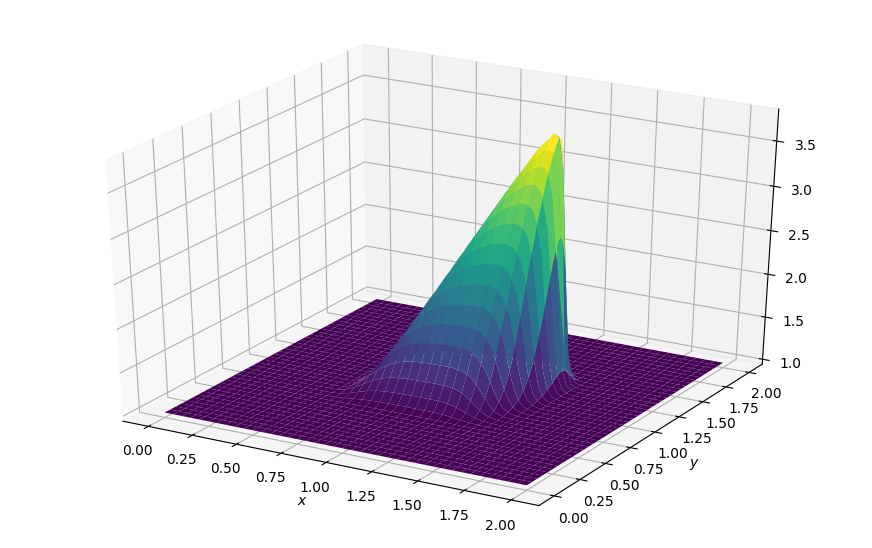

In [96]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:],cmap=cm.viridis,rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

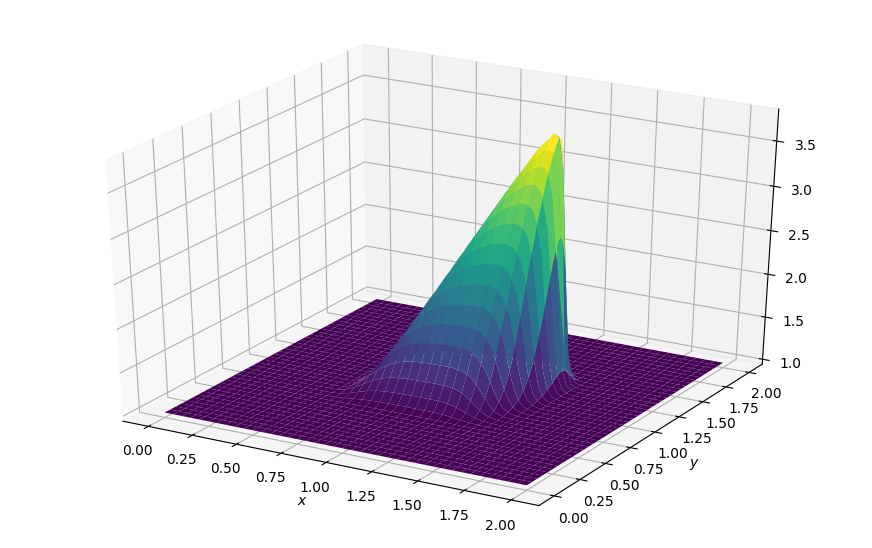

In [97]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v[:],cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

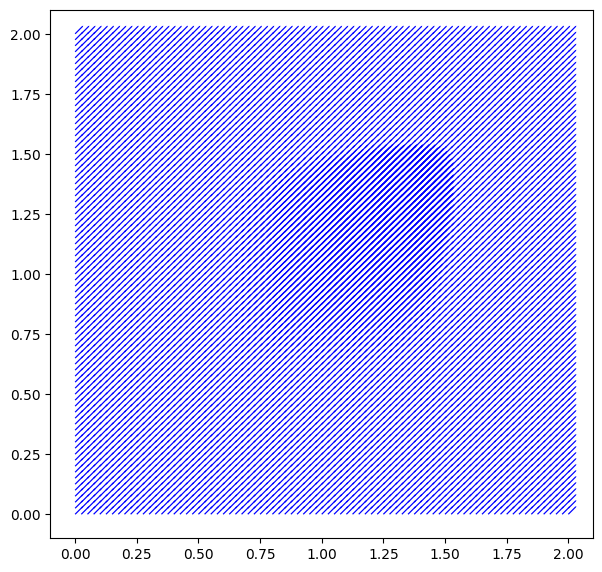

In [98]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)

q = ax.quiver(X, Y, u, v,units='xy', scale=30, zorder=1, color='blue',
          width=0.005, headwidth=1, headlength=1)

#ax.quiverkey(q, X=0.3, Y=1.1, U=10,
#             label='Quiver key, length = 10', labelpos='E')

plt.show()